# Simple gradient descent on $ x^{2} $

This illustrates how gradient descent works without getting too complicated.

Gradient descent attempts to minimise the output of a function – any function – step by step. Here, we choose a very basic function that return $ x^{2} $, based on [this tutorial](https://mccormickml.com/2014/03/04/gradient-descent-derivation/).

The tutorial contains the data for the first ten iterations, so it's useful to compare results.


To grasp the basic principle, you don't yet need to familiarise yourself with derivatives. Just accept, for the time being, that the derivative of $ x $ for $ x^{2} $ is $ 2x $.

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [74]:
def f(x):
    return x**2

In [75]:
# alpha / learning rate
l_r = 0.1

# theta, i.e. starting point
theta = 3

# define no. iterations
iterations = 20

df = pd.DataFrame({"Theta": [np.nan] * iterations})
df["Cost"] = np.nan
df.at[0, "Theta"] = theta

In [76]:
def deriv(x):
    # derivative, which for x^2 is 2. This tells us the gradient at any particular point.
    return x * 2

def step(theta, l_r):
    cost = f(theta)
    new_theta = theta - l_r * deriv(theta)
    return cost, new_theta

def gradient_descent(df, l_r):
    for i, row in df.iterrows():
        theta = df.at[i, "Theta"]
        cost, new_theta = step(theta, l_r)
        df.at[i, "Cost"] = cost
        next_i = i + 1
        if next_i in df.index: df.at[next_i, "Theta"] = new_theta

gradient_descent(df, l_r)

In [77]:
df

,Theta,Cost
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


Text(0.5, 0.98, 'Theta and Cost during gradient descent on x²')

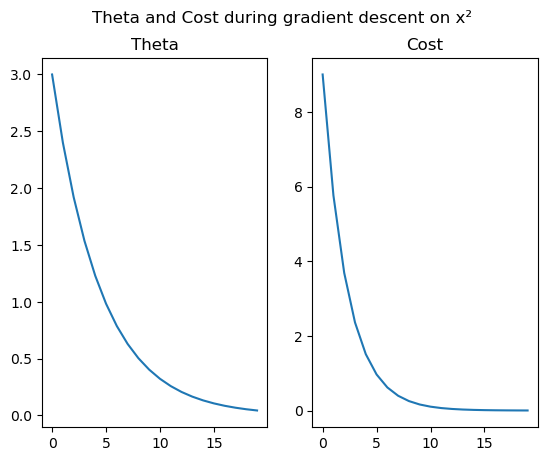

In [78]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(df["Theta"])
axs[0].set(title="Theta")
axs[1].plot(df["Cost"])
axs[1].set(title="Cost")
fig.suptitle("Theta and Cost during gradient descent on x²")
